In [1]:
# std python utility
from pathlib import Path
from collections import Counter
import os
# ds utility
import pandas
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# ds modelling
# import sklearn

import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000
pd.set_option('display.max_columns', None)

# directory setup
ROOT = Path(os.getcwd())
DATA_DIR = ROOT / "input"
PLOT_DIR = ROOT / "plots"

display(ROOT, DATA_DIR)
os.listdir(DATA_DIR)

WindowsPath('C:/Users/hlao1/Github/kaggle-titanic')

WindowsPath('C:/Users/hlao1/Github/kaggle-titanic/input')

['gender_submission.csv', 'test.csv', 'train.csv']

In [2]:
# Load datasets
train = pd.read_csv(DATA_DIR/"train.csv")
test = pd.read_csv(DATA_DIR/"test.csv")
train_shape = train.shape
test_shape = test.shape
feat_cols = train.columns.to_list()
# surface level inspection of the training data loaded
display(train.head())
# display general info about the dataset
display(train.info())
# observe general stats of feat-cols 
display(train.describe())
display("Train shape:",train_shape)
display("Test shappe:",test_shape)
display(feat_cols)
print("Number of features:",len(feat_cols))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


'Train shape:'

(891, 12)

'Test shappe:'

(418, 11)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Number of features: 12


Exclude PassengerId because it is known to be a a unique identifier -- an index of the instance defined. 11 features of interest.

- How do the various features relate to one another? Ex. Sex vs Survived?
- Is there missing data?

In [3]:
cols = ['Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
corr = train[cols].corr()
corr.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225


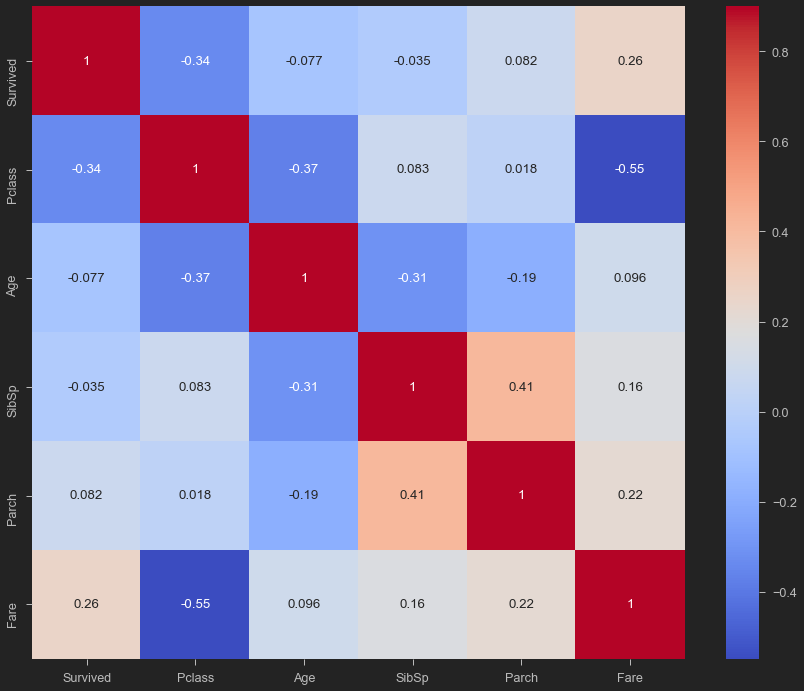

In [4]:
plt.subplots(figsize=(15,12))
sns_plot = sns.heatmap(corr, vmax=0.9, cmap="coolwarm", square=True, annot= True)
fig = sns_plot.get_figure()
fig.savefig(PLOT_DIR/"train_heatmap.png")

In [5]:
# sorted_mat = corr.unstack().sort_values() # includes duplications

# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = corr.where(
    np.triu(np.ones(corr.shape), k=1).astype(np.bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()
print(sorted_mat)



Fare    Pclass     -0.549500
Age     Pclass     -0.369226
Pclass  Survived   -0.338481
SibSp   Age        -0.308247
Parch   Age        -0.189119
Age     Survived   -0.077221
SibSp   Survived   -0.035322
Parch   Pclass      0.018443
        Survived    0.081629
SibSp   Pclass      0.083081
Fare    Age         0.096067
        SibSp       0.159651
        Parch       0.216225
        Survived    0.257307
Parch   SibSp       0.414838
dtype: float64


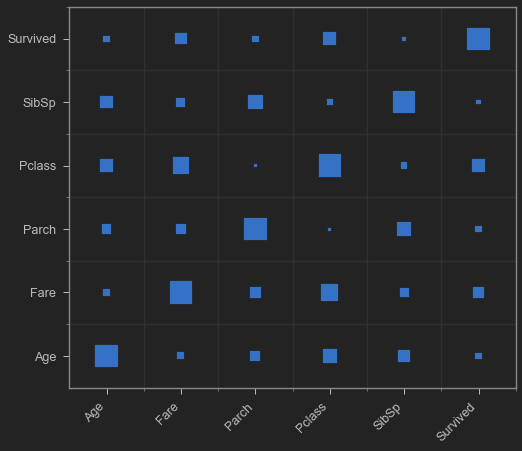

In [6]:
# classification_setup = classification.setup(data=train, target="Survived")

| Model	| Accuracy	|AUC	|Recall	|Prec.	|F1	|Kappa	|MCC	|TT (Sec)|
|---|---|---|---|---|---|---|---|---|
|ridge	|Ridge Classifier	|0.8204	|0.0000	|0.7348	|0.8106	|0.7672	|0.6219	|0.6275	|0.0340|
|et	|Extra Trees Classifier	|0.8171	|0.8505	|0.6792	|0.8420	|0.7481	|0.6078	|0.6196	|0.1810|
|catboost|	CatBoost Classifier	|0.8170	|0.8716	|0.6472	|0.8722	|0.7381	|0.6033	|0.6228	|3.5190|
|lr	|Logistic Regression	|0.8108	|0.8606	|0.7348	|0.7900	|0.7570	|0.6029	|0.6082	|1.3130|
|gbc	|Gradient Boosting Classifier	|0.8074	|0.8540	|0.6391	|0.8508	|0.7241	|0.5823	|0.6004	|0.2360
|rf	|Random Forest Classifier	|0.8058	|0.8586	|0.6592	|0.8296	|0.7302	|0.5826	|0.5956	|0.2010|
|dt	|Decision Tree Classifier	|0.8028	|0.7907	|0.7269	|0.7766	|0.7489	|0.5870	|0.5900	|0.0330|
|ada	|Ada Boost Classifier	|0.8009	|0.8550	|0.6985	|0.7886	|0.7348	|0.5778	|0.5849	|0.1100|
|xgboost|	Extreme Gradient Boosting	|0.7818	|0.8530	|0.7148	|0.7396	|0.7222	|0.5435	|0.5482	|0.8680|
|lightgbm|	Light Gradient Boosting Machine	|0.7817	|0.8653	|0.6871	|0.7585	|0.7154	|0.5400	|0.5468	|0.1530|
|knn	|K Neighbors Classifier	|0.6903	|0.7146	|0.5398	|0.6461	|0.5839	|0.3413	|0.3474	|0.0700|
|svm	|SVM - Linear Kernel	|0.6228	|0.0000	|0.7485	|0.6053	|0.6163	|0.2840	|0.3131	|0.0420|
|lda	|Linear Discriminant Analysis	|0.6081	|0.6264	|0.4848	|0.5380	|0.5038	|0.1838	|0.1847	|0.1940|
|nb	|Naive Bayes	|0.4751	|0.5516	|0.9522	|0.4330	|0.5950	|0.0871	|0.1611	|0.0320|
|qda	|Quadratic Discriminant Analysis	|0.4045	|0.5000	|1.0000	|0.4045	|0.5760	|0.0000	|0.0000	|0.0750|